Dataset url: https://statso.io/car-insurance-modelling-case-study/#google_vignette

Objetivo:

Car Insurance Modelling is a statistical approach used by Insurance companies to predict and assess risks associated with insuring cars and drivers. It typically involves using historical data on insurance claims, customer demographics, vehicle details, and other relevant factors to predict future claims, set premiums, and understand risk factors.

The dataset provided for Car Insurance Modelling consists of information related to drivers and their vehicle claims. Key variables include:

age_of_driver: The age of the driver.
car_age: The age of the car in years.
region: The geographical region where the driver resides (e.g., Urban, Rural, Suburban).
number_of_claims: The count of claims made by the driver.

The task is to predict the frequency of insurance claims made by drivers based on their age, the age of their cars, and the region they reside in.

#### 1. Análise dos Dados

In [1]:
# importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

In [2]:
# Importação dos dados e 5 primeiros registros
insurance_df = pd.read_csv('insurance_claims.csv')
insurance_df.head()

,age_of_driver,car_age,region,number_of_claims
0,30,7,Urban,0
1,33,10,Rural,2
2,39,11,Suburban,1
3,18,12,Urban,0
4,21,8,Urban,0


In [3]:
# Informações sobre o conjunto de dados
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age_of_driver     1000 non-null   int64 
 1   car_age           1000 non-null   int64 
 2   region            1000 non-null   object
 3   number_of_claims  1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [4]:
# Há dados nulos/ausentes?
insurance_df.isna().sum()

age_of_driver       0
car_age             0
region              0
number_of_claims    0
dtype: int64

In [5]:
# Total de cada região
insurance_df['region'].value_counts()

region
Rural       343
Suburban    343
Urban       314
Name: count, dtype: int64

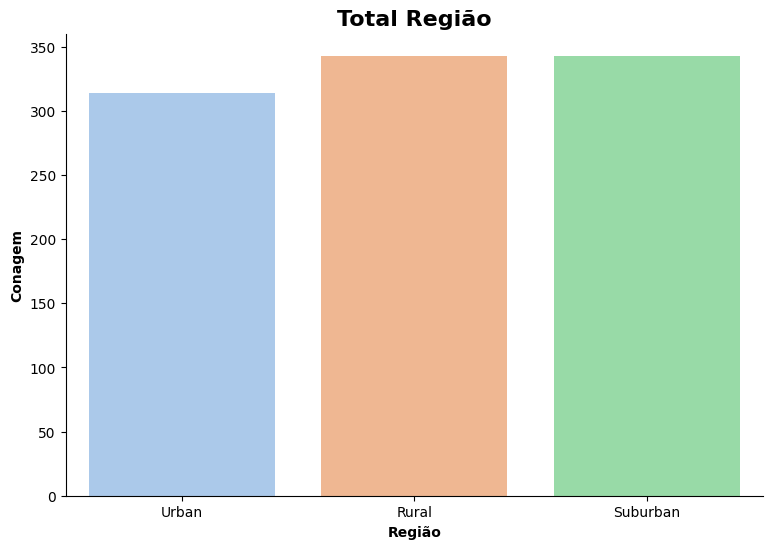

In [6]:
# Gráfico com o total de cada região
plt.figure(figsize=(9,6))
plt.xlabel('Região', fontdict={'weight': 'bold'})
plt.ylabel('Conagem', fontdict={'weight': 'bold'})
plt.title('Total Região', fontdict={'weight': 'bold', 'fontsize': 16})
sns.despine()
sns.countplot(data=insurance_df, x='region', hue='region', palette='pastel', legend=False);

In [7]:
# Resumo Estatístico
insurance_df.describe()

,age_of_driver,car_age,number_of_claims
count,1000.000000,1000.000000,1000.000000
mean,33.112000,6.673000,0.675000
std,9.253598,4.377583,0.822223
min,18.000000,0.000000,0.000000
25%,25.000000,3.000000,0.000000
50%,33.000000,6.000000,0.000000
75%,41.000000,11.000000,1.000000
max,49.000000,14.000000,5.000000


In [8]:
# Outliers com Boxplot

# age_of_driver
figure = px.box(insurance_df['age_of_driver'])
figure.show();

In [9]:
# car_age
figure = px.box(insurance_df['car_age'])
figure.show();

#### 2. Tratamento dos dados
<p>Nesse conjunto de dados apenas precisa ser transformado o atributo 'region' para tipo quantitativo</p>

In [10]:
# Usaremos o método map do Python
# urban = 0, rural = 1, suburban = 2

mapeamento = {'Urban': 0, 'Rural': 1, 'Suburban': 2}
insurance_df['region'] = insurance_df['region'].map(mapeamento)
insurance_df.head()

,age_of_driver,car_age,region,number_of_claims
0,30,7,0,0
1,33,10,1,2
2,39,11,2,1
3,18,12,0,0
4,21,8,0,0


In [11]:
# Correlação entre as variáveis e a variável-alvo (number_of_claims)
insurance_df.corr()

,age_of_driver,car_age,region,number_of_claims
age_of_driver,1.000000,-0.022397,-0.013781,-0.129669
car_age,-0.022397,1.000000,0.024119,0.065835
region,-0.013781,0.024119,1.000000,0.023171
number_of_claims,-0.129669,0.065835,0.023171,1.000000


Observações da Matriz de Correlação:
* age_of_driver tem uma correlação negativa moderada com number_of_claims (-0.129669), sugerindo que motoristas mais velhos tendem a ter menos sinistros.
* car_age tem uma correlação positiva fraca com number_of_claims (0.065835), indicando que carros mais velhos podem ter um ligeiro aumento no número de sinistros.
* region tem uma correlação muito fraca com number_of_claims (0.023171), sugerindo que a região não tem um impacto significativo no número de sinistros.

### 3. Modelagem

In [12]:
# Separando dados em treino e teste
X = insurance_df.iloc[:, 0:3].values 
y = insurance_df.iloc[:, -1].values

In [13]:
X.shape, y.shape

((1000, 3), (1000,))

In [14]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.3, random_state=42)

##### 3.1 Regressão com Statsmodels

In [15]:
# Adiciona uma constante ao modelo
X_sm = sm.add_constant(X_train)

# Ajusta o modelo de regressão linear
sm_model = sm.OLS(y_train, X_sm).fit()

# Exibe o resumo dos resultados
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.866
Date:                Mon, 12 Aug 2024   Prob (F-statistic):              0.135
Time:                        23:49:39   Log-Likelihood:                -381.83
No. Observations:                 300   AIC:                             771.7
Df Residuals:                     296   BIC:                             786.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6641      0.230      2.888      0.0

Conclusão: 

##### 3.2 Regressão Múltipla

In [16]:
reg_mult = LinearRegression()
reg_mult.fit(X_train, y_train)

LinearRegression()

In [17]:
previsoes = reg_mult.predict(X_test)

###### 3.2.1 Avaliação do modelo

In [18]:
print(r2_score(y_test, previsoes))
print(mean_squared_error(y_test, previsoes))

-0.009158546070133777
0.6423273550664034


Conclusão: 

#### 4.1 Random Forest

In [19]:
rnd_forest = RandomForestRegressor()
rnd_forest.fit(X_train, y_train)

RandomForestRegressor()

In [20]:
previsoes = rnd_forest.predict(X_test)

In [21]:
# Avaliando o modelo
r2 = r2_score(y_test, previsoes)
mse = mean_squared_error(y_test, previsoes)

print(f'R²: {r2}')
print(f'Mean Squared Error: {mse}')

R²: -0.35103993537966804
Mean Squared Error: 0.8599341616448007


In [22]:
# Verificando se o modelo melhora, através do gridsearch
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Criando o modelo de GridSearch
grid_search = GridSearchCV(estimator=rnd_forest, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Melhor conjunto de hiperparâmetros 
print(grid_search.best_params_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
{'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [23]:
# Avaliando o melhor modelo
best_model = grid_search.best_estimator_
previsoes_best = best_model.predict(X_test)
r2_best = r2_score(y_test, previsoes_best)
mse_best = mean_squared_error(y_test, previsoes_best)

print(f'R² (Melhor Modelo): {r2_best}')
print(f'Mean Squared Error (Melhor Modelo): {mse_best}')

R² (Melhor Modelo): -0.11864077474791812
Mean Squared Error (Melhor Modelo): 0.7120125701866934


Conclusão: 